# Gradient descent with line search

Author : Alexandre Gramfort

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

In [2]:
from optim_utils import mk_quad, mk_gauss, rosenbrock,\
    rosenbrock_prime, rosenbrock_hessian, LoggingFunction,\
    CountingFunction, super_fmt

In [3]:
def gradient_descent(x0, f, f_prime, default_step=1.):
    all_x_k, all_f_k = list(), list()
    x = x0

    for k in range(1, 30):
        all_x_k.append(x)
        all_f_k.append(f(x))
        grad_x = f_prime(x)
        x = x - default_step * grad_x
        if np.abs(all_f_k[-1]) < 1e-16:
            break
    return np.array(all_x_k), np.array(all_f_k)

In [4]:
def gradient_descent_line_search(x0, f, f_prime, default_step=1.,
                                 c1=0.0001, c2=0.9):
    all_x_k, all_f_k = list(), list()
    x = x0

    for k in range(1, 30):
        all_x_k.append(x)
        all_f_k.append(f(x))
        grad_x = f_prime(x)

        # Compute a step size using a line_search to satisfy the
        # Wolfe conditions
        step = optimize.line_search(f, f_prime, x, -grad_x, grad_x, c1=c1, c2=c2)[0]
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step
    
        x = x - step * grad_x
        if np.abs(all_f_k[-1]) < 1e-16:
            break
    return np.array(all_x_k), np.array(all_f_k)

In [5]:
def plot_convergence(ax, all_x_k, all_f_k, all_x, x_min, x_max, y_min, y_max):
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T

    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + .01)
    ax.imshow(log_z,
            extent=[x_min, x_max, y_min, y_max],
            cmap=plt.cm.gray_r, origin='lower',
            vmax=log_z.min() + 1.5*log_z.ptp())
    contours = ax.contour(log_z,
                        levels=levels.get(f, None),
                        extent=[x_min, x_max, y_min, y_max],
                        cmap=plt.cm.gnuplot, origin='lower')
    levels[f] = contours.levels
    ax.clabel(contours, inline=1, fmt=super_fmt, fontsize=14)

    ax.plot(all_x_k[:, 0], all_x_k[:, 1], 'b-', linewidth=2)
    ax.plot(all_x_k[:, 0], all_x_k[:, 1], 'k+')

    ax.plot(all_x[:, 0], all_x[:, 1], 'k.', markersize=4)

    ax.plot([0], [0], 'rx', markersize=12)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.draw()

    plt.tight_layout()
    plt.draw()

In [6]:
x_min, x_max = -1, 2
y_min, y_max = 2.25/3*x_min - .2, 2.25/3*x_max - .2
x_min *= 1.2
x_max *= 1.2
y_min *= 1.2
y_max *= 1.2

levels = dict()

default_step = 0.01
c1 = 0.0001
c2 = 0.9

c1 = 0.01
c2 = 0.05

def optimizer(x0, f, f_prime):
    return gradient_descent_line_search(x0, f, f_prime,
                                        default_step, c1, c2)

# def optimizer(x0, f, f_prime):
#     return gradient_descent(x0, f, f_prime, default_step)

Running solver on case 1
Running solver on case 2


/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Running solver on case 3
Line search did not converge at iteration 5


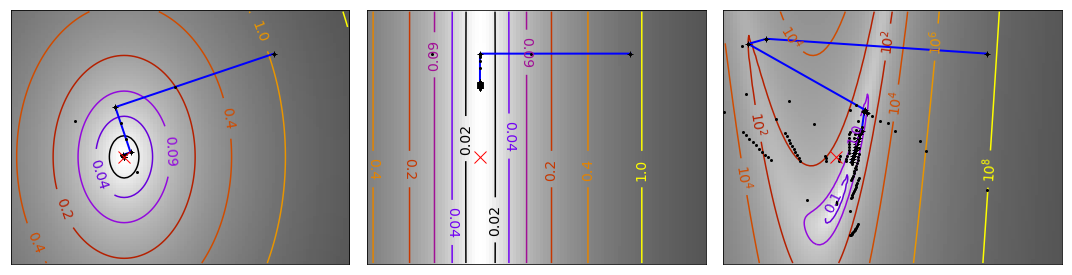

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for index, [ax, (f, f_prime, _)] in enumerate(zip(axes, (
                                mk_quad(.7),
                                mk_quad(.02),
                                (rosenbrock, rosenbrock_prime, rosenbrock_hessian)))):

    print("Running solver on case %d" % (index + 1))

    # Run optimization method logging all the function calls
    logging_f = LoggingFunction(f)
    x0 = np.array([1.6, 1.1])
    all_x_k, all_f_k = optimizer(x0, logging_f, f_prime)

    # Plot the convergence
    all_x = np.array(logging_f.all_x)
    plot_convergence(ax, all_x_k, all_f_k, all_x, x_min, x_max, y_min, y_max)

plt.show()